In [1]:
!pip install pandas_ods_reader

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.9/125.9 KB 1.2 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 1.8 MB/s eta 0:00:0000:0100:01
  Created wheel for ezodf: filename=ezodf-0.3.2-py2.py3-none-any.whl size=49003 sha256=1e70fb9447ea454cc26b7077879d1600a1f24270e369f20808741ab307d7d1eb
  Stored in directory: /home/vinicius/.cache/pip/wheels/50/09/62/ea2c44e6ffdd067d6c8d3f557af0734a195bd252d6901f23ca
Successfully built ezodf


In [7]:
#Basic imports
from pandas_ods_reader import read_ods
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
#sklearn imports
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.manifold import TSNE     #T-Distributed Stochastic Neighbor Embedding
from sklearn.cluster import KMeans    #K-Means Clustering
from sklearn.preprocessing import StandardScaler #used for 'Feature Scaling'

#plotly imports
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot


In [56]:
sns.set()
# base_path = "data/ESG_1312.ods"

data = pd.read_csv('../datasets/trains-uptated.csv', sep=',')


# data_lin = read_ods(base_path , sheet_index1)   # linear data

data

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,...,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,4,2,2,long,openrect,1,rectanglod,2,short,openrect,...,1,0,0,0,0,0,0,0,0,east
1,4,2,2,short,openrect,2,circlelod,2,short,closedtrap,...,0,0,1,0,0,0,0,0,0,east
2,4,3,2,short,ushaped,1,trianglod,2,short,openrect,...,1,0,1,0,0,0,0,0,0,east
3,5,3,2,short,opentrap,1,circlelod,2,short,ushaped,...,1,0,0,0,0,1,0,0,0,east
4,4,3,2,short,closedrect,1,trianglod,2,short,closedtrap,...,0,0,1,0,0,1,0,0,0,east
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3,2,short,openrect,3,rectanglod,2,short,hexagon,...,0,0,1,1,0,1,0,0,0,west
96,3,2,2,short,hexagon,2,circlelod,2,long,closedrect,...,0,0,1,0,0,0,0,0,0,west
97,3,2,2,short,slopetoprect,1,circlelod,3,long,closedrect,...,0,0,0,1,0,0,0,0,0,west
98,3,1,2,short,slopetoprect,1,trianglod,2,short,openrect,...,0,0,0,1,0,0,0,0,0,west


In [61]:
# Obtém os índices do DataFrame
indices = data.index

# Cria a lista de IDs utilizando os índices
train_ids = [f"Train{index}" for index in indices]

# Opcional: verifica o resultado
print(train_ids)


['Train0', 'Train1', 'Train2', 'Train3', 'Train4', 'Train5', 'Train6', 'Train7', 'Train8', 'Train9', 'Train10', 'Train11', 'Train12', 'Train13', 'Train14', 'Train15', 'Train16', 'Train17', 'Train18', 'Train19', 'Train20', 'Train21', 'Train22', 'Train23', 'Train24', 'Train25', 'Train26', 'Train27', 'Train28', 'Train29', 'Train30', 'Train31', 'Train32', 'Train33', 'Train34', 'Train35', 'Train36', 'Train37', 'Train38', 'Train39', 'Train40', 'Train41', 'Train42', 'Train43', 'Train44', 'Train45', 'Train46', 'Train47', 'Train48', 'Train49', 'Train50', 'Train51', 'Train52', 'Train53', 'Train54', 'Train55', 'Train56', 'Train57', 'Train58', 'Train59', 'Train60', 'Train61', 'Train62', 'Train63', 'Train64', 'Train65', 'Train66', 'Train67', 'Train68', 'Train69', 'Train70', 'Train71', 'Train72', 'Train73', 'Train74', 'Train75', 'Train76', 'Train77', 'Train78', 'Train79', 'Train80', 'Train81', 'Train82', 'Train83', 'Train84', 'Train85', 'Train86', 'Train87', 'Train88', 'Train89', 'Train90', 'Train91

In [72]:
pd.set_option('display.max_columns', None)

In [67]:
data.columns

Index(['Number_of_cars', 'Number_of_different_loads', 'num_wheels1', 'length1',
       'shape1', 'num_loads1', 'load_shape1', 'num_wheels2', 'length2',
       'shape2', 'num_loads2', 'load_shape2', 'num_wheels3', 'length3',
       'shape3', 'num_loads3', 'load_shape3', 'num_wheels4', 'length4',
       'shape4', 'num_loads4', 'load_shape4', 'Rectangle_next_to_rectangle',
       'Rectangle_next_to_triangle', 'Rectangle_next_to_hexagon',
       'Rectangle_next_to_circle', 'Triangle_next_to_triangle',
       'Triangle_next_to_hexagon', 'Triangle_next_to_circle',
       'Hexagon_next_to_hexagon', 'Hexagon_next_to_circle',
       'Circle_next_to_circle', 'Class_attribute'],
      dtype='object')

In [99]:
import pandas as pd

# Carregar o CSV
data = pd.read_csv('../datasets/trains-uptated.csv', sep=',')

# Mapeamentos
length_mapping = {'short': 1, 'long': 2}

shape_mapping = {
    'closedblopnrect': 1,
    'closedrect': 2,
    'closedtrap': 3,
    'closedushaped': 4,
    'dblopnrect': 5,
    'ellipse': 6,
    'hexagon': 7,
    'jaggedrect': 8,
    'openrect': 9,
    'opentrap': 10,
    'slopetopdblopnrect': 11,
    'slopetoprect': 12,
    'slopetoptrap': 13,
    'slopetopushaped': 14,
    'ushaped': 15
}

load_shapes_mapping = {
    'circlelod': 1,
    'Hexagonlod': 2,
    'rectanglod': 3,
    'trianglod': 4
}

class_atribute = {
    'east': 0,
    'west': 1
}

# Preencher valores ausentes com -1
data.replace("None", pd.NA, inplace=True)


# data.fillna(-1, inplace=True)

# Aplicar os mapeamentos nas colunas de comprimento
for col in ['length1', 'length2', 'length3', 'length4']:
    data[col] = data[col].map(length_mapping)
                    
# Aplicar os mapeamentos nas colunas de forma
for col in ['shape1', 'shape2', 'shape3', 'shape4']:
    data[col] = data[col].map(shape_mapping)

# Aplicar os mapeamentos nas colunas de formato de carga
for col in ['load_shape1', 'load_shape2', 'load_shape3', 'load_shape4']:
    data[col] = data[col].map(load_shapes_mapping)

data['Class_attribute'] = data['Class_attribute'].map(class_atribute)

# Salvar o CSV transformado
data


,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute
0,4,2,2,2,9,1,3.0,2,1,9,1,4.0,2,2.0,2.0,3,3.0,<NA>,NaN,NaN,<NA>,NaN,0,1,0,0,0,0,0,0,0,0,0
1,4,2,2,1,9,2,1.0,2,1,3,1,3.0,2,1.0,9.0,1,1.0,<NA>,NaN,NaN,<NA>,NaN,0,0,0,1,0,0,0,0,0,0,0
2,4,3,2,1,15,1,4.0,2,1,9,1,3.0,2,1.0,2.0,1,1.0,<NA>,NaN,NaN,<NA>,NaN,0,1,0,1,0,0,0,0,0,0,0
3,5,3,2,1,10,1,1.0,2,1,15,1,4.0,2,2.0,9.0,3,3.0,2,1.0,9.0,1,3.0,1,1,0,0,0,0,1,0,0,0,0
4,4,3,2,1,2,1,4.0,2,1,3,1,1.0,2,1.0,15.0,1,3.0,<NA>,NaN,NaN,<NA>,NaN,0,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3,2,1,9,3,3.0,2,1,7,1,1.0,2,1.0,10.0,1,4.0,2,1.0,5.0,1,4.0,0,0,0,1,1,0,1,0,0,0,1
96,3,2,2,1,7,2,1.0,2,2,2,3,3.0,<NA>,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,<NA>,NaN,0,0,0,1,0,0,0,0,0,0,1
97,3,2,2,1,12,1,1.0,3,2,2,1,3.0,<NA>,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,<NA>,NaN,0,0,0,0,1,0,0,0,0,0,1
98,3,1,2,1,12,1,4.0,2,1,9,1,4.0,<NA>,NaN,NaN,<NA>,NaN,<NA>,NaN,NaN,<NA>,NaN,0,0,0,0,1,0,0,0,0,0,1


In [100]:
data.fillna(-1, inplace=True)

In [132]:
data.to_csv("socroo.csv")


In [131]:
data["Train"] = range(1, len(data) + 1)

In [136]:

X = pd.read_csv("socroo.csv", index_col=0)

header = X.loc[0 ,:] 
#Initialize our scaler
scaler = StandardScaler()
#Scale each column in number
#X = pd.DataFrame(scaler.fit_transform(X),index=cat_country)
X

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Train
0,4,2,2,2,9,1,3.0,2,1,9,1,4.0,2,2.0,2.0,3,3.0,-1.0,-1.0,-1.0,-1,-1.0,0,1,0,0,0,0,0,0,0,0,0,1
1,4,2,2,1,9,2,1.0,2,1,3,1,3.0,2,1.0,9.0,1,1.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,1,0,0,0,0,0,0,0,2
2,4,3,2,1,15,1,4.0,2,1,9,1,3.0,2,1.0,2.0,1,1.0,-1.0,-1.0,-1.0,-1,-1.0,0,1,0,1,0,0,0,0,0,0,0,3
3,5,3,2,1,10,1,1.0,2,1,15,1,4.0,2,2.0,9.0,3,3.0,2.0,1.0,9.0,1,3.0,1,1,0,0,0,0,1,0,0,0,0,4
4,4,3,2,1,2,1,4.0,2,1,3,1,1.0,2,1.0,15.0,1,3.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,1,0,0,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3,2,1,9,3,3.0,2,1,7,1,1.0,2,1.0,10.0,1,4.0,2.0,1.0,5.0,1,4.0,0,0,0,1,1,0,1,0,0,0,1,96
96,3,2,2,1,7,2,1.0,2,2,2,3,3.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,1,0,0,0,0,0,0,1,97
97,3,2,2,1,12,1,1.0,3,2,2,1,3.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,0,1,0,0,0,0,0,1,98
98,3,1,2,1,12,1,4.0,2,1,9,1,4.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,0,1,0,0,0,0,0,1,99


In [80]:
#Xlog

In [137]:
kmeans = KMeans(n_clusters=2)
#Fit our model
kmeans.fit(X)

/home/vinicius/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=2)

In [138]:
clusters = kmeans.predict(X)
#Add the cluster vector to our DataFrame, X
X["Cluster"] = clusters
X

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Train,Cluster
0,4,2,2,2,9,1,3.0,2,1,9,1,4.0,2,2.0,2.0,3,3.0,-1.0,-1.0,-1.0,-1,-1.0,0,1,0,0,0,0,0,0,0,0,0,1,1
1,4,2,2,1,9,2,1.0,2,1,3,1,3.0,2,1.0,9.0,1,1.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,1,0,0,0,0,0,0,0,2,1
2,4,3,2,1,15,1,4.0,2,1,9,1,3.0,2,1.0,2.0,1,1.0,-1.0,-1.0,-1.0,-1,-1.0,0,1,0,1,0,0,0,0,0,0,0,3,1
3,5,3,2,1,10,1,1.0,2,1,15,1,4.0,2,2.0,9.0,3,3.0,2.0,1.0,9.0,1,3.0,1,1,0,0,0,0,1,0,0,0,0,4,1
4,4,3,2,1,2,1,4.0,2,1,3,1,1.0,2,1.0,15.0,1,3.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,1,0,0,1,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5,3,2,1,9,3,3.0,2,1,7,1,1.0,2,1.0,10.0,1,4.0,2.0,1.0,5.0,1,4.0,0,0,0,1,1,0,1,0,0,0,1,96,0
96,3,2,2,1,7,2,1.0,2,2,2,3,3.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,1,0,0,0,0,0,0,1,97,0
97,3,2,2,1,12,1,1.0,3,2,2,1,3.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,0,1,0,0,0,0,0,1,98,0
98,3,1,2,1,12,1,4.0,2,1,9,1,4.0,-1,-1.0,-1.0,-1,-1.0,-1.0,-1.0,-1.0,-1,-1.0,0,0,0,0,1,0,0,0,0,0,1,99,0


In [139]:
#header = X.loc[0 ,:] 

#plotX is a DataFrame containing 124 values sampled randomly from X
#plotX = pd.DataFrame(np.array(X.sample(124)))
plotX = pd.DataFrame(np.array(X.sample(100)))

#Rename plotX's columns since it was briefly converted to an np.array above
plotX.columns = X.columns # X.loc[0 ,:]    # X.columns
plotX

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Train,Cluster
0,4.0,2.0,2.0,1.0,8.0,1.0,3.0,2.0,1.0,9.0,1.0,4.0,2.0,2.0,2.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,38.0,1.0
1,4.0,2.0,2.0,2.0,9.0,1.0,3.0,2.0,1.0,9.0,1.0,4.0,2.0,2.0,2.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,5.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,3.0,2.0,9.0,3.0,3.0,2.0,1.0,15.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,56.0,0.0
3,4.0,1.0,2.0,1.0,10.0,2.0,1.0,2.0,1.0,10.0,1.0,1.0,2.0,1.0,15.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.0,1.0
4,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,95.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.0,2.0,2.0,1.0,10.0,1.0,3.0,2.0,1.0,15.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0
96,5.0,3.0,2.0,1.0,15.0,1.0,3.0,2.0,2.0,9.0,3.0,3.0,2.0,1.0,1.0,1.0,3.0,2.0,1.0,10.0,1.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1.0
97,4.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,10.0,1.0,4.0,2.0,2.0,9.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,27.0,1.0
98,3.0,2.0,2.0,1.0,9.0,1.0,4.0,2.0,1.0,9.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,16.0,1.0


In [140]:
#PCA with one principal component
pca_1d = PCA(n_components=1)

#PCA with two principal components
pca_2d = PCA(n_components=2)

#PCA with three principal components
#pca_3d = PCA(n_components=3)

#PCA with three principal components
#pca_4d = PCA(n_components=4)


In [141]:
#This DataFrame holds that single principal component mentioned above
# PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))
PCs_1d = pd.DataFrame(pca_1d.fit_transform(plotX))

#This DataFrame contains the two principal components that will be used
#for the 2-D visualization mentioned above
# PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))
PCs_2d = pd.DataFrame(pca_2d.fit_transform(plotX))

#And this DataFrame contains three principal components that will aid us
#in visualizing our clusters in 3-D
# PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))
#PCs_3d = pd.DataFrame(pca_3d.fit_transform(plotX))

In [142]:
PCs_1d.columns = ["PC1_1d"]

#"PC1_2d" means: 'The first principal component of the components created for 2-D visualization, by PCA.'
#And "PC2_2d" means: 'The second principal component of the components created for 2-D visualization, by PCA.'
PCs_2d.columns = ["PC1_2d", "PC2_2d"]

#PCs_3d.columns = ["PC1_3d", "PC2_3d", "PC3_3d"]

In [144]:
plotClusters = []
plotClusters = [plotX["Cluster"], PCs_1d,PCs_2d] #,PCs_3d]

#plotX = pd.concat([plotX,PCs_1d,PCs_2d,PCs_3d], axis=1, join='inner')
plotX = pd.concat([plotX,PCs_1d,PCs_2d], axis=1, join='inner')
plotX["dummy"] = 0
cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
#cluster2 = plotX[plotX["Cluster"] == 2]
#cluster3 = plotX[plotX["Cluster"] == 3]

cluster0
# plotClusters[0]
#cluster3 = plotX[plotX["Cluster"] == 3]

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Train,Cluster,PC1_1d,PC1_2d,PC2_2d,dummy,PC1_1d,PC1_2d,PC2_2d
2,5.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,3.0,2.0,9.0,3.0,3.0,2.0,1.0,15.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,56.0,0.0,-5.300514,-5.300514,13.427038,0,-5.300514,-5.300514,13.427038
4,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,95.0,0.0,-44.963992,-44.963992,-6.747433,0,-44.963992,-44.963992,-6.747433
6,5.0,3.0,2.0,1.0,9.0,3.0,3.0,2.0,1.0,7.0,1.0,1.0,2.0,1.0,10.0,1.0,4.0,2.0,1.0,5.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,96.0,0.0,-45.192138,-45.192138,8.103375,0,-45.192138,-45.192138,8.103375
8,4.0,2.0,2.0,1.0,6.0,2.0,3.0,3.0,2.0,9.0,1.0,3.0,2.0,1.0,1.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,0.0,-11.650143,-11.650143,-4.114971,0,-11.650143,-11.650143,-4.114971
10,4.0,2.0,2.0,1.0,9.0,1.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,9.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,90.0,0.0,-39.512415,-39.512415,-0.410373,0,-39.512415,-39.512415,-0.410373
12,3.0,2.0,2.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,97.0,0.0,-46.984156,-46.984156,-6.773867,0,-46.984156,-46.984156,-6.773867
13,5.0,2.0,2.0,1.0,13.0,1.0,3.0,2.0,1.0,5.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,9.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0,0.0,-10.554383,-10.554383,5.750163,0,-10.554383,-10.554383,5.750163
14,5.0,2.0,2.0,1.0,10.0,1.0,4.0,2.0,1.0,5.0,1.0,4.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0,15.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,71.0,0.0,-20.545575,-20.545575,10.010909,0,-20.545575,-20.545575,10.010909
17,4.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,10.0,1.0,3.0,3.0,2.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,81.0,0.0,-30.562858,-30.562858,-3.707835,0,-30.562858,-30.562858,-3.707835
18,4.0,2.0,2.0,1.0,15.0,1.0,1.0,3.0,2.0,8.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,65.0,0.0,-14.549849,-14.549849,-4.121526,0,-14.549849,-14.549849,-4.121526


In [145]:
cluster0['Train'] = "Train"+cluster0['Train'].astype('str')
cluster1['Train'] = "Train"+cluster1['Train'].astype('str')
#cluster2['id'] = cluster2['id'].astype('int')
#cluster3['id'] = cluster3['id'].astype('int')


/tmp/ipykernel_3870/2842639651.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_3870/2842639651.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
cluster0

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Train,Cluster,PC1_1d,PC1_2d,PC2_2d,dummy,PC1_1d,PC1_2d,PC2_2d
2,5.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,3.0,2.0,9.0,3.0,3.0,2.0,1.0,15.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Train56.0,0.0,-5.300514,-5.300514,13.427038,0,-5.300514,-5.300514,13.427038
4,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Train95.0,0.0,-44.963992,-44.963992,-6.747433,0,-44.963992,-44.963992,-6.747433
6,5.0,3.0,2.0,1.0,9.0,3.0,3.0,2.0,1.0,7.0,1.0,1.0,2.0,1.0,10.0,1.0,4.0,2.0,1.0,5.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Train96.0,0.0,-45.192138,-45.192138,8.103375,0,-45.192138,-45.192138,8.103375
8,4.0,2.0,2.0,1.0,6.0,2.0,3.0,3.0,2.0,9.0,1.0,3.0,2.0,1.0,1.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train62.0,0.0,-11.650143,-11.650143,-4.114971,0,-11.650143,-11.650143,-4.114971
10,4.0,2.0,2.0,1.0,9.0,1.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,9.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train90.0,0.0,-39.512415,-39.512415,-0.410373,0,-39.512415,-39.512415,-0.410373
12,3.0,2.0,2.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train97.0,0.0,-46.984156,-46.984156,-6.773867,0,-46.984156,-46.984156,-6.773867
13,5.0,2.0,2.0,1.0,13.0,1.0,3.0,2.0,1.0,5.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,9.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train61.0,0.0,-10.554383,-10.554383,5.750163,0,-10.554383,-10.554383,5.750163
14,5.0,2.0,2.0,1.0,10.0,1.0,4.0,2.0,1.0,5.0,1.0,4.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0,15.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Train71.0,0.0,-20.545575,-20.545575,10.010909,0,-20.545575,-20.545575,10.010909
17,4.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,10.0,1.0,3.0,3.0,2.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train81.0,0.0,-30.562858,-30.562858,-3.707835,0,-30.562858,-30.562858,-3.707835
18,4.0,2.0,2.0,1.0,15.0,1.0,1.0,3.0,2.0,8.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train65.0,0.0,-14.549849,-14.549849,-4.121526,0,-14.549849,-14.549849,-4.121526


In [147]:
len(cluster0)

50

In [148]:
#cluster3['id'].values[0]
#country_cluster0 = {}
#for i in range(len(cluster0)):
#    country_cluster0[i] = cat_country[cluster0['id'].values[i]]

train_cluster0 = {}
for i in range(len(cluster0)):
    train_cluster0[i] = cluster0['Train'].values[i]

train_cluster1 = {}
for i in range(len(cluster1)):
    train_cluster1[i] = cluster1['Train'].values[i]

#country_cluster3 = {}
#for i in range(len(cluster3)):
#    country_cluster3[i] = cat_country[cluster3['id'].values[i]]



In [149]:
cluster1

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Train,Cluster,PC1_1d,PC1_2d,PC2_2d,dummy,PC1_1d,PC1_2d,PC2_2d
0,4.0,2.0,2.0,1.0,8.0,1.0,3.0,2.0,1.0,9.0,1.0,4.0,2.0,2.0,2.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train38.0,1.0,12.390819,12.390819,-4.225531,0,12.390819,12.390819,-4.225531
1,4.0,2.0,2.0,2.0,9.0,1.0,3.0,2.0,1.0,9.0,1.0,4.0,2.0,2.0,2.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train1.0,1.0,49.347170,49.347170,-5.399600,0,49.347170,49.347170,-5.399600
3,4.0,1.0,2.0,1.0,10.0,2.0,1.0,2.0,1.0,10.0,1.0,1.0,2.0,1.0,15.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Train6.0,1.0,44.868489,44.868489,0.398919,0,44.868489,44.868489,0.398919
5,5.0,2.0,2.0,1.0,15.0,1.0,3.0,2.0,2.0,9.0,3.0,3.0,2.0,2.0,8.0,2.0,3.0,2.0,2.0,8.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train44.0,1.0,6.801345,6.801345,7.216238,0,6.801345,6.801345,7.216238
7,3.0,2.0,2.0,1.0,9.0,1.0,3.0,2.0,1.0,5.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train42.0,1.0,8.087165,8.087165,-8.202596,0,8.087165,8.087165,-8.202596
9,4.0,3.0,2.0,1.0,2.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,2.0,1.0,15.0,1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,Train5.0,1.0,45.566529,45.566529,0.242070,0,45.566529,45.566529,0.242070
11,4.0,2.0,2.0,1.0,8.0,1.0,3.0,2.0,1.0,15.0,1.0,1.0,2.0,1.0,7.0,1.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train37.0,1.0,13.769319,13.769319,-1.622567,0,13.769319,13.769319,-1.622567
15,3.0,2.0,2.0,1.0,2.0,1.0,3.0,2.0,1.0,9.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train29.0,1.0,21.088683,21.088683,-8.406410,0,21.088683,21.088683,-8.406410
16,4.0,3.0,2.0,1.0,15.0,1.0,4.0,2.0,1.0,9.0,1.0,3.0,2.0,1.0,2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train3.0,1.0,47.424497,47.424497,-5.867917,0,47.424497,47.424497,-5.867917
19,5.0,2.0,2.0,1.0,5.0,1.0,1.0,2.0,1.0,10.0,1.0,1.0,3.0,2.0,8.0,1.0,4.0,2.0,1.0,15.0,1.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,Train50.0,1.0,0.747696,0.747696,12.963225,0,0.747696,0.747696,12.963225


In [150]:
cluster_0 = cluster0.drop(columns=['Cluster', 'PC1_1d','PC1_2d','PC2_2d','dummy'])
cluster_1 = cluster1.drop(columns=['Cluster', 'PC1_1d','PC1_2d','PC2_2d','dummy'])
#cluster_2 = cluster2.drop(columns=['Cluster', 'PC1_1d','PC1_2d','PC2_2d','PC1_3d','PC2_3d','PC3_3d','dummy'])
#cluster_3 = cluster3.drop(columns=['Cluster', 'PC1_1d','PC1_2d','PC2_2d','PC1_3d','PC2_3d','PC3_3d','dummy'])

In [151]:
cluster_0

,Number_of_cars,Number_of_different_loads,num_wheels1,length1,shape1,num_loads1,load_shape1,num_wheels2,length2,shape2,num_loads2,load_shape2,num_wheels3,length3,shape3,num_loads3,load_shape3,num_wheels4,length4,shape4,num_loads4,load_shape4,Rectangle_next_to_rectangle,Rectangle_next_to_triangle,Rectangle_next_to_hexagon,Rectangle_next_to_circle,Triangle_next_to_triangle,Triangle_next_to_hexagon,Triangle_next_to_circle,Hexagon_next_to_hexagon,Hexagon_next_to_circle,Circle_next_to_circle,Class_attribute,Train
2,5.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,5.0,1.0,1.0,3.0,2.0,9.0,3.0,3.0,2.0,1.0,15.0,1.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Train56.0
4,3.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Train95.0
6,5.0,3.0,2.0,1.0,9.0,3.0,3.0,2.0,1.0,7.0,1.0,1.0,2.0,1.0,10.0,1.0,4.0,2.0,1.0,5.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,Train96.0
8,4.0,2.0,2.0,1.0,6.0,2.0,3.0,3.0,2.0,9.0,1.0,3.0,2.0,1.0,1.0,1.0,4.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train62.0
10,4.0,2.0,2.0,1.0,9.0,1.0,3.0,2.0,2.0,2.0,3.0,3.0,2.0,1.0,9.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train90.0
12,3.0,2.0,2.0,1.0,7.0,2.0,1.0,2.0,2.0,2.0,3.0,3.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train97.0
13,5.0,2.0,2.0,1.0,13.0,1.0,3.0,2.0,1.0,5.0,1.0,1.0,2.0,2.0,2.0,1.0,3.0,3.0,2.0,9.0,1.0,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train61.0
14,5.0,2.0,2.0,1.0,10.0,1.0,4.0,2.0,1.0,5.0,1.0,4.0,3.0,2.0,2.0,1.0,3.0,2.0,1.0,15.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Train71.0
17,4.0,3.0,2.0,1.0,9.0,1.0,1.0,2.0,1.0,10.0,1.0,3.0,3.0,2.0,2.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,Train81.0
18,4.0,2.0,2.0,1.0,15.0,1.0,1.0,3.0,2.0,8.0,3.0,3.0,2.0,1.0,2.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Train65.0


In [152]:
train_df = pd.DataFrame({'Train': train_ids})
#train_ids
train_df

,Train
0,Train0
1,Train1
2,Train2
3,Train3
4,Train4
...,...
95,Train95
96,Train96
97,Train97
98,Train98


In [153]:
#with pd.ExcelWriter('ESG_1312_cluster0.xlsx') as excel_writer:
#    cluster_0.to_excel(excel_writer, sheet_name='Sheet1', index=False)
#cluster0.to_excel('ESG_1312_cluster0.xlsx', index=False)

In [154]:
#with pd.ExcelWriter('ESG_1312_cluster1.xlsx') as excel_writer:
#    cluster_1.to_excel(excel_writer, sheet_name='Sheet1', index=False)
#with pd.ExcelWriter('ESG_1312_cluster2.xlsx') as excel_writer:
#    cluster_2.to_excel(excel_writer, sheet_name='Sheet1', index=False)
#with pd.ExcelWriter('ESG_1312_cluster3.xlsx') as excel_writer:
#    cluster_3.to_excel(excel_writer, sheet_name='Sheet1', index=False)

In [155]:
A = np.array(plotX["Cluster"])
fA= pd.DataFrame(A.astype(int))
A


array([1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 1.,
       0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.])

In [156]:
A = np.array(plotX["Cluster"])
fA= pd.DataFrame(A.astype(int))
fA = pd.concat([fA, train_df,PCs_2d], axis=1, join='inner')
fA
#fA = pd.concat([fA, pais,PCs_2d], axis=1, join='inner')

#cluster_1 = fA[fA[0] == 0]
#cluster_2 = fA[fA[0] == 1]
#cluster_3 = fA[fA[0] == 2]
#cluster_4 = fA[fA[0] == 3]

#fA
#cluster_4
#fA["PC1_2d"]
#fA



,0,Train,PC1_2d,PC2_2d
0,1,Train0,12.390819,-4.225531
1,1,Train1,49.347170,-5.399600
2,0,Train2,-5.300514,13.427038
3,1,Train3,44.868489,0.398919
4,0,Train4,-44.963992,-6.747433
...,...,...,...,...
95,1,Train95,35.389422,-8.235524
96,1,Train96,32.516585,4.731556
97,1,Train97,23.687140,-1.063647
98,1,Train98,34.190251,-8.586498


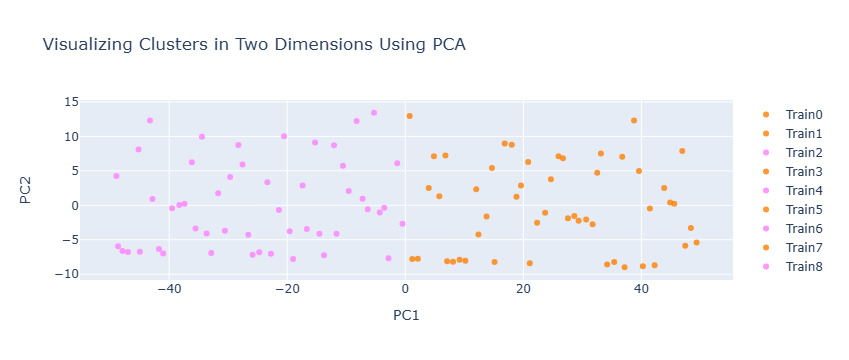

In [158]:
#for i in range(1, len(df.columns)):
#    col_name = 'S'+ str(i)
#    fig.add_trace(go.Scatter(x=df['DateTime'], y=df[col_name],
#                        mode='lines', # 'lines' or 'markers'
#                        name=col_name))
trains_cluster = []
colors = ['rgba(255, 128, 255, 0.8)', 'rgba(255, 128, 2, 0.8)', 'rgba(0, 255, 200, 0.8)','rgba(255, 55, 0, 0.8)']
#colors = ['rgba(255, 128, 255, 0.8)', 'rgba(255, 128, 2, 0.8)', 'rgba(0, 255, 200, 0.8)']

for i in range(100):
    trains_cluster.append(go.Scatter(
        x = [fA["PC1_2d"][i]],
        y = [fA["PC2_2d"][i]],
        mode = "markers",
        name = fA['Train'][i],
        marker = dict(color = colors[int(fA[0][i])]),
        #text = cat_country[i+1]
    ))
    
title = "Visualizing Clusters in One Dimension Using PCA"

data = trains_cluster #, trace4]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [38]:
data = []

country_cluster = []
colors = ['rgba(255, 128, 255, 0.8)', 'rgba(255, 128, 2, 0.8)', 'rgba(0, 255, 200, 0.8)']
for i in range(124):
    data.append(go.Scatter(
                        x = [plotX["PC1_2d"][i]], #x=df_X_reduced[0],
                        y = [0], # ['Cluster ' + str(int(plotX['Cluster'][i]))], 
                        mode = "markers",
                        name = 'Cluster ' + str(int(plotX['Cluster'][i])),
                        #name = 'Cluster ' + str(int(plotX['Cluster'][i])) , # cat_country[i+1],
                        #marker = dict(color = colors[int(plotX['Cluster'][i])]),
                        #text = cat_country[i+1]
                        #showlegend=True
                ))
    
title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

fig['data'][0]['showlegend'] = False
#fig['data'][0]['name'] = 'Humidity'

iplot(fig)

KeyError: 0

In [39]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_1d"], #x=df_X_reduced[0],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

#######################################################################
#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster3["PC1_1d"],
                    y = cluster3["dummy"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(200, 105, 45, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4] #, trace4]

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

NameError: name 'cluster2' is not defined

In [40]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["PC1_2d"],
                    y = cluster0["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["PC1_2d"],
                    y = cluster1["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)
###################################################
#trace4 is for 'Cluster 3'
trace4 = go.Scatter(
                    x = cluster2["PC1_2d"],
                    y = cluster2["PC2_2d"],
                    mode = "markers",
                    name = "Cluster 3",
                    marker = dict(color = 'rgba(200, 105, 45, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3, trace4] #, trace4]

title = "Visualizing Clusters in Two Dimensions Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'PC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

NameError: name 'cluster2' is not defined

In [41]:
data = []
colors = ['rgba(255, 128, 255, 0.8)', 'rgba(255, 128, 2, 0.8)', 'rgba(0, 255, 200, 0.8)']
for i in range(124):
    data.append(go.Scatter(
                        x = [plotX["PC1_1d"][i]], #x=df_X_reduced[0],
                        y = [plotX["PC2_2d"][i]],
                        mode = "markers",
#                         name = cat_country[i+1],
                        #marker = dict(color = colors[int(plotX['Cluster'][i])]),
                        #text = cat_country[i+1])
    ))
 
title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

KeyError: 0

In [ ]:
data = []
colors = ['rgba(255, 128, 255, 0.8)', 'rgba(255, 128, 2, 0.8)', 'rgba(0, 255, 200, 0.8)']
for i in range(len(cat_country)):
    data.append(go.Scatter(
                        x = [plotX["PC1_1d"][i]], #x=df_X_reduced[0],
                        y = [0],
                        mode = "markers",
#                         name = cat_country[i+1],
                        #marker = dict(color = colors[int(plotX['Cluster'][i])]),
                        #text = cat_country[i+1]
    ))

title = "Visualizing Clusters in One Dimension Using PCA"

layout = dict(title = title,
              xaxis= dict(title= 'PC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout, )


In [ ]:
#Initialize our scaler
#scaler = StandardScaler()

#Scale each column in numer

#plotX will hold the values we wish to plot
plotX = pd.DataFrame(np.array(Y.sample(124)))
plotX.columns = Y.columns

In [ ]:
#Set our perplexity
perplexity = 50

#T-SNE with one dimension
tsne_1d = TSNE(n_components=1, perplexity=perplexity)

#T-SNE with two dimensions
tsne_2d = TSNE(n_components=2, perplexity=perplexity)

#T-SNE with three dimensions
tsne_3d = TSNE(n_components=3, perplexity=perplexity)

In [ ]:
#This DataFrame holds a single dimension,built by T-SNE
TCs_1d = pd.DataFrame(tsne_1d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#This DataFrame contains two dimensions, built by T-SNE
TCs_2d = pd.DataFrame(tsne_2d.fit_transform(plotX.drop(["Cluster"], axis=1)))

#And this DataFrame contains three dimensions, built by T-SNE
TCs_3d = pd.DataFrame(tsne_3d.fit_transform(plotX.drop(["Cluster"], axis=1)))

In [ ]:
TCs_1d.columns = ["TC1_1d"]

PCs_1d.columns = ["PC1_1d"]

#"TC1_2d" means: 'The first component of the components created for 2-D visualization, by T-SNE.'
#And "TC2_2d" means: 'The second component of the components created for 2-D visualization, by T-SNE.'
TCs_2d.columns = ["TC1_2d","TC2_2d"]

TCs_3d.columns = ["TC1_3d","TC2_3d","TC3_3d"]


In [ ]:
plotX = pd.concat([plotX,TCs_1d,TCs_2d,TCs_3d], axis=1, join='inner')

In [ ]:
plotX["dummy"] = 0

cluster0 = plotX[plotX["Cluster"] == 0]
cluster1 = plotX[plotX["Cluster"] == 1]
cluster2 = plotX[plotX["Cluster"] == 2]

In [95]:
#Instructions for building the 1-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_1d"],
                    y = cluster0["dummy"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_1d"],
                    y = cluster1["dummy"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_1d"],
                    y = cluster2["dummy"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in One Dimension Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= '',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

KeyError: 'TC1_1d'

In [ ]:
#Instructions for building the 2-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter(
                    x = cluster0["TC1_2d"],
                    y = cluster0["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter(
                    x = cluster1["TC1_2d"],
                    y = cluster1["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter(
                    x = cluster2["TC1_2d"],
                    y = cluster2["TC2_2d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Two Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

In [96]:
##Instructions for building the 3-D plot

#trace1 is for 'Cluster 0'
trace1 = go.Scatter3d(
                    x = cluster0["TC1_3d"],
                    y = cluster0["TC2_3d"],
                    z = cluster0["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 0",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text = None)

#trace2 is for 'Cluster 1'
trace2 = go.Scatter3d(
                    x = cluster1["TC1_3d"],
                    y = cluster1["TC2_3d"],
                    z = cluster1["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 1",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text = None)

#trace3 is for 'Cluster 2'
trace3 = go.Scatter3d(
                    x = cluster2["TC1_3d"],
                    y = cluster2["TC2_3d"],
                    z = cluster2["TC3_3d"],
                    mode = "markers",
                    name = "Cluster 2",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text = None)

data = [trace1, trace2, trace3]

title = "Visualizing Clusters in Three Dimensions Using T-SNE (perplexity=" + str(perplexity) + ")"

layout = dict(title = title,
              xaxis= dict(title= 'TC1',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'TC2',ticklen= 5,zeroline= False)
             )

fig = dict(data = data, layout = layout)

iplot(fig)

KeyError: 'TC1_3d'